# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [63]:
import pandas as pd
import sklearn as sk
import numpy as np
from palmerpenguins import load_penguins
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import plotnine as p9

In [25]:
# Code Here
dataset = load_penguins().dropna()
dataset

dum = pd.get_dummies(dataset)

clean_df = pd.concat([dataset, dum], axis=1)

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [80]:
# Model 1
x1 = clean_df.drop({"bill_depth_mm", "sex", "island", "species"}, axis = 1)
y1 = clean_df["bill_depth_mm"]

x_train, x_test, y_train, y_test = train_test_split(x1,y1, test_size = 0.25)

x1_train_subset = x_train["bill_length_mm"]
x1_test_subset = x_test["bill_length_mm"]

model_1 = LinearRegression().fit(x1_train_subset, y_train)

MSE_Train_1 = mean_squared_error(y_train, model_1.predict(x1_train_subset))
MSE_Test_1 = mean_squared_error(y_test, model_1.predict(x1_test_subset))

In [79]:
#model2 
x2_train_subset = x_train[["bill_length_mm", "flipper_length_mm"]]
x2_test_subset = x_test[["bill_length_mm", "flipper_length_mm"]]

model_2 = LinearRegression().fit(x2_train_subset, y_train)

MSE_Train_2 = mean_squared_error(y_train, model_2.predict(x2_train_subset))
MSE_Test_2 = mean_squared_error(y_test, model_2.predict(x2_test_subset))

In [78]:
#model3
x3_train_subset = x_train[["bill_length_mm", "sex_male", "island_Dream"]]
x3_test_subset = x_test[["bill_length_mm", "sex_male", "island_Dream"]]

model_3 = LinearRegression().fit(x3_train_subset, y_train)

MSE_Train_3 = mean_squared_error(y_train, model_3.predict(x3_train_subset))
MSE_Test_3 = mean_squared_error(y_test, model_3.predict(x3_test_subset))

In [77]:
#model4
x4_train_subset = x_train[x_train.columns.tolist()]
x4_test_subset = x_test[x_test.columns.tolist()]

model_4 = LinearRegression().fit(x4_train_subset, y_train)

MSE_Train_4 = mean_squared_error(y_train, model_4.predict(x4_train_subset))
MSE_Test_4 = mean_squared_error(y_test, model_4.predict(x4_test_subset))

In [88]:
x1.shape[1]

16

In [99]:
data_sum = { 
    "model": ["Model1", "Model2", "Model3", "Model4"],
    "flex": [1,2,3,16], 
    "MSE_Train": [MSE_Train_1 ,MSE_Train_2 ,MSE_Train_3 , MSE_Train_4],
    "MSE_Test": [MSE_Test_1, MSE_Test_2, MSE_Test_3, MSE_Test_4]
}

summary = pd.DataFrame(data_sum).sort_values("flex")

Long = summary.melt(id_vars=["model","flex"],
                    value_vars = ["MSE_Train", "MSE_Test"],
                    var_name= "split", 
                    value_name="MSE"
)
Long["split"] = Long["split"].str.replace("_mse","", regex=False)

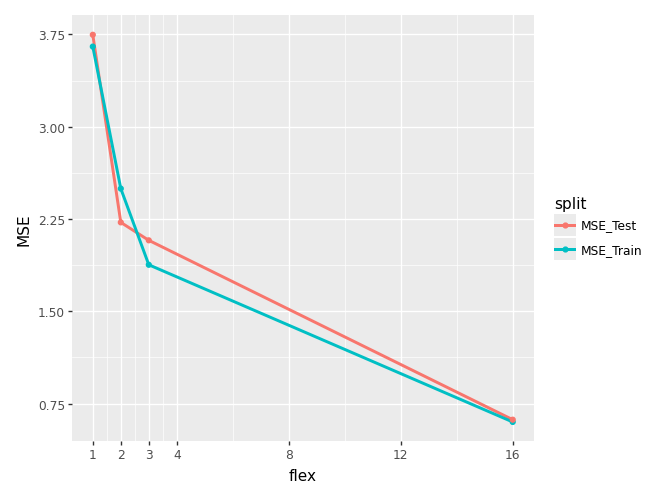

In [110]:
(p9.ggplot(Long, p9.aes("flex", "MSE", color = "split", group = "split"))
+p9.geom_line(size = 1.2)
+p9.geom_point()
+p9.scale_y_continuous(breaks=[0.75,1.5,2.25,3,3.75])
+p9.scale_x_continuous(breaks=[1,2,3,4,8,12,16])
)

The Training model performs slighly better having the lowest mean squared eroor in the final model 
indicating that we should be training our models to see a better performance. 